# Further study

The landscape of BNN is actively changing. Sadly this means that very interesting works were not covered in this course due to time constraints

This notebook presents some topics that were not discussed during the course and extends others that were only briefly mentioned

## Uncertainty estimation with deterministic neural networks: The case of Deep ensembles

In a BNN every parameter (weight and biases) has a distribution. An approximation of this posterior distribution is typically obtained using VI. Using the posterior of the parameters we define a posterior for the predictions. Evaluating on new data samples returns as a sample of predictions drawn from this posterior.

Training a BNN is much more expensive (and noisier) than training a deterministic neural network. This motivates an alternative to estimating uncertainty based on ensembles of deterministic neural networks trained using MAP [(Laksminarayanan, Pritzel and Blundell, 2016)](https://arxiv.org/abs/1612.01474).

Predicting with an ensemble of deterministic neural networks would return a sample of predictions, which can then be used as a sort of posterior distribution. This key is how to introduce randomness so that there is diversity in the ensemble

One way to do this is by using bagging (bootstrap resampling), i.e. training the deterministic NNs with subsamples of the training data (drawn with replacement). But this has been shown to be worse than using the full dataset for all the individual classifiers [(Nixon, Laksminarayanan and Tran,  2020)](https://openreview.net/forum?id=dTCir0ceyv0)

In the original paper the randomization comes only from

- The initial values of parameters of the neural networks (default pytorch initialization)
- The shuffling of training data points

One key aspect of this work is that to smooth the predictive distributions, adversarial examples are used. They also highlight the use of the variance of the predictions in the case of regression. The full algorithm goes as follows

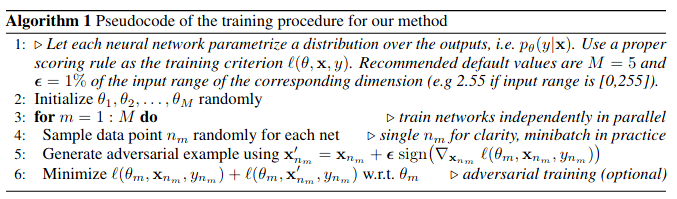

The paper compares ensembles with MC-dropout (which can also be interpreted as an ensemble method), showing that it is much better at detecting out-of-distribution samples. [(Gustafsson et al 2020)](https://arxiv.org/pdf/1906.01620.pdf) obtains a similar result when comparing ensembles and MC-dropout for computer vision architectures. A more through comparison (including SVI and other alternatives) is given in [Ovadia et al. 2019](https://arxiv.org/pdf/1906.02530.pdf)


- A more theoretical insight on the difference between ensemble and variational solutions is given in [(Fort 2020)](https://arxiv.org/pdf/1912.02757.pdf)
- [(Dusenberry et al 2020)](https://arxiv.org/abs/2005.07186) proposes an interesting alternative of combining BNN and ensembles
- Other non-bayesian approaches for detecting out-of-distribution are presented in [(Hendrinks and Gimpel, 2016)](https://arxiv.org/abs/1610.02136) and [(Guo et al. 2017)](https://arxiv.org/abs/1706.04599) (temperature scaling)



## More on Gaussian processes and Neural Networks

The connection between a Gaussian process and a single hidden layer MLP is well known. Here are some representatives of interesting bodies of work focused on the relationship between GP and Deep Learning


- [Deep kernel learning](https://arxiv.org/abs/1511.02222): The inputs of a spectral mixture kernel are transformed with deep neural networks. Solution has a closed form and can replace existing kernels easily. Available as a `pyro` [example](http://pyro.ai/examples/dkl.html)
- [A recursive GP kernel that is related to infinitely-wide multi-layer dense neural networks](https://openreview.net/forum?id=B1EA-M-0Z). A similar relation is explored [here](https://arxiv.org/abs/1804.11271). [This paper](https://arxiv.org/abs/1906.01930) relates the training of GP and BNN and show that a GP kernel can be obtained from VI (gaussian distributions), hence relating the posteriors
- [Deep Gaussian processes](https://arxiv.org/abs/1211.0358): Composition (stacks) of GPs. Note that this is not the same as function (kernel)composition. [Excellent tutorial by Neil Lawrence](http://inverseprobability.com/talks/notes/deep-gaussian-processes.html) that covers sparse and deep GPs. DGP are less used in practice than BNN due to their higher cost but they can be combined as [shown here](https://arxiv.org/abs/2105.04504) and also more efficient methods to train them have been [proposed](https://arxiv.org/pdf/1602.04133.pdf). Finally, the following is a `pyro` demonstration of a two layer DGP trained with MCMC: https://fehiepsi.github.io/blog/deep-gaussian-process/
- [Neural Tangent Kernel (NTK)](https://arxiv.org/abs/2007.05864): A modification to deep ensemble training so that they can be interpreted as a GP predictive posterior in the infinite width limit. The NTK was introduced in [(Jacot, Gabriel and Hongler, 2018)](https://arxiv.org/abs/1806.07572) as a description of the training evolution of deep NNs using kernel methods


## What are Bayesian Neural Networks Posteriors Really Like

This work by [(Izmailov et al. 2021)](https://arxiv.org/pdf/2104.14421.pdf) trains deep neural networks using Hamiltonian Monte Carlo (HMC). HMC as other MCMC methods gaurantess asymptotically exact samples from the true posterior. They recognize that this requires extreme computational requirements but do it anyway to evaluate how good are the approximate posteriors and deterministic approximations used nowadays. They show that

- BNN can perform better than regular training and deep ensembles
- A single HMC chain provides a comparable posterior to running several shorter chains
- Posterior tempering (temperature scaling) is actually not needed
- High variance Gaussian priors led to strong performance and results are robust to the scale. Performance using Gaussian, MoG and logistic priors is not too different. **A vague prior in parameter space is not necessarily a vague prior in function space**. This result is very conflicting with [(Fortuin et al. 2021)](https://arxiv.org/pdf/2102.06571.pdf)!
- BNN have good performance on out-of-distribution samples but perform poorly under domain shift (ensembles are better in this case)
- The predictive distribution of the compared methods differs from that of HMC. Ensembles seem to be closer to HMC than mean-field VI (MFVI). But in terms of entropies they HMC is more overconfident than MFVI



## More on `pyro`

Computation:

- Support for Just-in-time (JIT) compilation: http://pyro.ai/examples/jit.html
- Using `horovod` to perform distributed training: http://pyro.ai/examples/svi_horovod.html

Methods:

- Markov models: http://pyro.ai/examples/dmm.html
- Topic modeling: http://pyro.ai/examples/prodlda.html
- Gaussian mixture models (and other discrete latent variable models): http://pyro.ai/examples/gmm.html
- Kalman filters: http://pyro.ai/examples/ekf.html
- Bayesian optimization in pyro: http://pyro.ai/examples/bo.html
- Importance sampling: http://pyro.ai/examples/inclined_plane.html

## List of links

- [An interesting post by Andrew G. Wilson](https://cims.nyu.edu/~andrewgw/caseforbdl/) on some misunderstandings about Bayesian deep learning and the difference with deep ensembles
- [A tutorial on Bayesian Neural Networks](https://wjmaddox.github.io/assets/BNN_tutorial_CILVR.pdf) by Wesley Maddox (from the group of A.G. Wilson). Fundamentals and recent works
- [Operator (functions of functions) Variational Inference (OPVI)](https://arxiv.org/abs/1610.09033): New objective functions for VI based on the Langevin-stein operator instead of the KL divergence
- [Yes, but Did it Work? Evaluating Variational Inference](https://arxiv.org/pdf/1802.02538.pdf): Two diagnostic algorithms to assess problems in variational approximations of posterior distributions



